# **GROUP 8 - Solutions to P01**

**Students:**
- Marek Majoch, <s13mmajo@uni-bonn.de>, M.Sc Astrophysics
- Yanhanle Lauryn Zhao, <s19yzhao@uni-bonn.de>, M.Sc Astrophysics
- Diana Victoria Lopez Navarro, <s09dlope@uni-bonn.de>, M.Sc Astrophysics
**Deadline:** 17. Oct 2024, 13:00 
_______________________________________________________


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math 
from mpl_toolkits import mplot3d
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as mticker

## Problem 1: Randomly sampling points on the sphere

- Write a piece of code that will sample 10,000 points uniformly distributed on the surface of a sphere. Your code should return the points' angular coordinates $\theta, \phi$ (you can assume a unit sphere wlog).


In [2]:
def sample_sphere_0(n):
    """
    Computes two random and uniform distribution in the coordinates theta and phi. 
    """
    theta =  np.random.uniform(0,np.pi,n)
    phi = np.random.uniform(0,2*np.pi,n)

    return theta, phi

In [3]:
#Sampling 10 000 points in a sphere
sphere = sample_sphere_0(10000)

To visualize the sampling computed, we must transform from spherical to cartesian coordinates.
$$S_2\ (r,\theta,\phi) \rightarrow S_2\ (x,y,z) $$ \
\begin{align*}
x & =r\ \sin \theta \ \cos \phi \\
y & =r\ \sin \theta \ \sin \phi \\
z & =\ r\ \cos \theta 
\end{align*}

In [4]:
def get_cartesian_coords(phi, theta, r = 1):
    x= r*np.sin(theta)*np.cos(phi)
    y= r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z

In [5]:
cartesian_sphere = get_cartesian_coords(sphere[1],sphere[0])

C:\Users\coki1\AppData\Local\Temp/ipykernel_2892/191728711.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig)


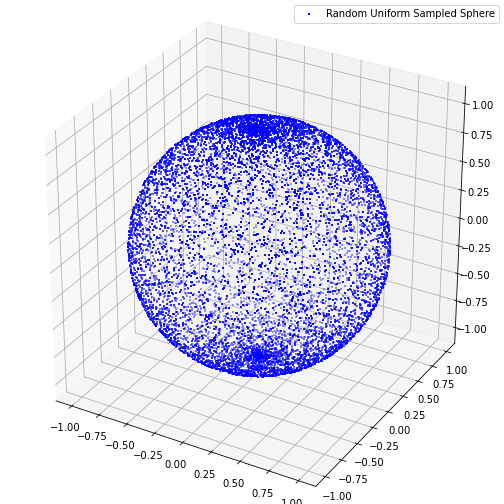

In [6]:
# Plot creating figure 
fig = plt.figure(figsize = (7, 7)) 
ax1 = Axes3D(fig) 

# creating the plot 
plot_geeks = ax1.scatter(cartesian_sphere[0], cartesian_sphere[1], cartesian_sphere[2], color = "b",
                         marker=",",s=1, label="Random Uniform Sampled Sphere") 
# displaying the plot 
ax1.set_box_aspect([1, 1, 1])
plt.legend()
plt.show() 

### Why the distribution exhibits a higher density of points in the poles compared to the equator?

The explain this, we need to take a look at the surface element on a unit sphere (r constant):

$$dS_r = \sin{\theta}\ d\theta\ d\phi $$ 

This imply that an infinitesimal angle displacement $d\theta$ near the equator ($\theta = \pi/2$) is related to a bigger area, compared to the same infinitesimal angle displacement near the poles ($\theta = 0;\pi$). For this reason, a uniform sampling in $\theta$ lead to an excess of points near the poles.

The surface element can be re-written as $$dS_r = -d(\cos{\theta})\ d\phi $$

Leading to a simple solution of the problem... **Compute a random uniform sampling of $\cos{\theta}$ in the interval (-1,1] and then compute the inverse function $\arccos \theta$. Following this procedure, we can obtain an appropiate uniform distribution of the points in the $\theta$ coordinate.** As we show below ...


In [7]:
def sample_sphere(n):
    """
    Computes two random and uniform distribution in the coordinates theta and phi. 
    """
    cos_theta = np.random.uniform(-1,1,n)
    theta = np.arccos(cos_theta)
    phi = np.random.uniform(0,2*np.pi,n)

    return theta, phi, cos_theta

In [8]:
sphere = sample_sphere(10000)

In [9]:
cartesian_sphere = get_cartesian_coords(sphere[1],sphere[0])

C:\Users\coki1\AppData\Local\Temp/ipykernel_2892/788349399.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig)


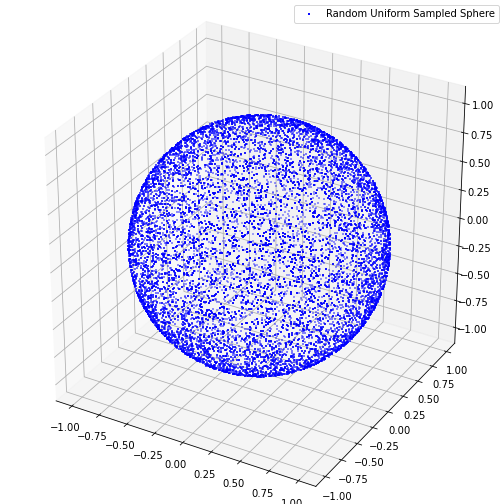

In [10]:
# creating figure 
fig = plt.figure(figsize = (7, 7)) 
ax1 = Axes3D(fig) 

# creating the plot 
plot_geeks = ax1.scatter(cartesian_sphere[0], cartesian_sphere[1], cartesian_sphere[2], color = "b",
                         marker=",",s=1, label="Random Uniform Sampled Sphere") 
# displaying the plot 
ax1.set_box_aspect([1, 1, 1])
plt.legend()
plt.show() 

- Write a piece of code that will project the points into Carthesian coordinates ($x, y, z$), again assuming unit radius
**Solution:** The function was named get_cartesian_coords (cell [4])

- Make three 2D scatter plots of the points after projecting along the $x, y$ and $z$ axis. 


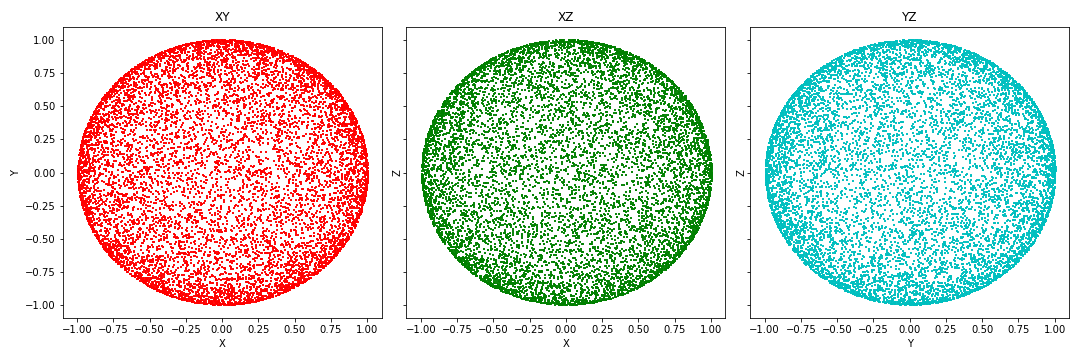

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)

#1st scatter plot
axs[0].scatter(cartesian_sphere[0], cartesian_sphere[1], color='r', label='', marker=",",s=1)
axs[0].set_title('XY')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

#2nd scatter plot
axs[1].scatter(cartesian_sphere[0], cartesian_sphere[2], color='g', label='', marker=",",s=1)
axs[1].set_title('XZ')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')

#3rd scatter plot
axs[2].scatter(cartesian_sphere[1], cartesian_sphere[2], color='c', label='', marker=",",s=1)
axs[2].set_title('YZ')
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')

# Spacing
plt.tight_layout()

plt.show()


- Plot a 1D histogram of the $x, y$ and $z$ distributions.

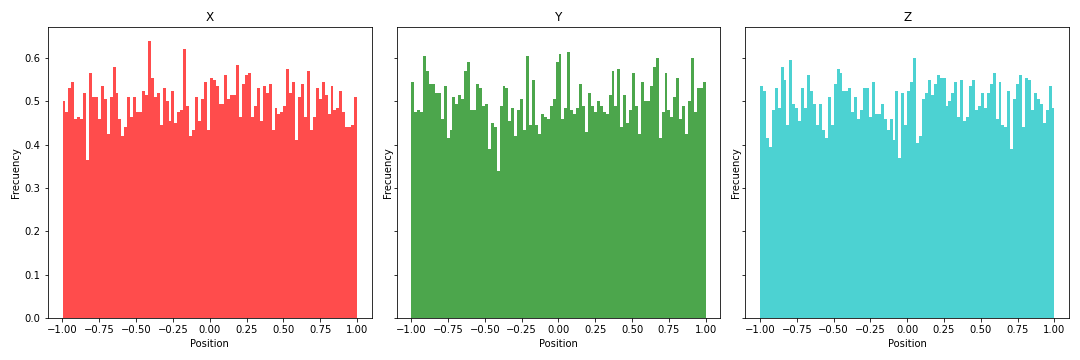

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)

# X Histogram
axs[0].hist(cartesian_sphere[0], bins=100, color='r', alpha=0.7,density=True)
axs[0].set_title('X')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Frecuency')

# Y Histogram
axs[1].hist(cartesian_sphere[1], bins=100, color='g', alpha=0.7, density=True)
axs[1].set_title('Y')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Frecuency')

# Z Histogram
axs[2].hist(cartesian_sphere[2], bins=100, color='c', alpha=0.7, density=True)
axs[2].set_title('Z')
axs[2].set_xlabel('Position')
axs[2].set_ylabel('Frecuency')

#plt.axis([-1, 1, 0, 160])
# Spacing
plt.tight_layout()

plt.show()

------------------------------

- Interpret your results. In particular, discuss if your points are uniformly distributed. Why? Why not?

### Interpretation

The histograms show a uniform random distribution in each one of the projections with respect to the X, Y and Z axis. 

.....

------------------------------

**Additional Plots:**

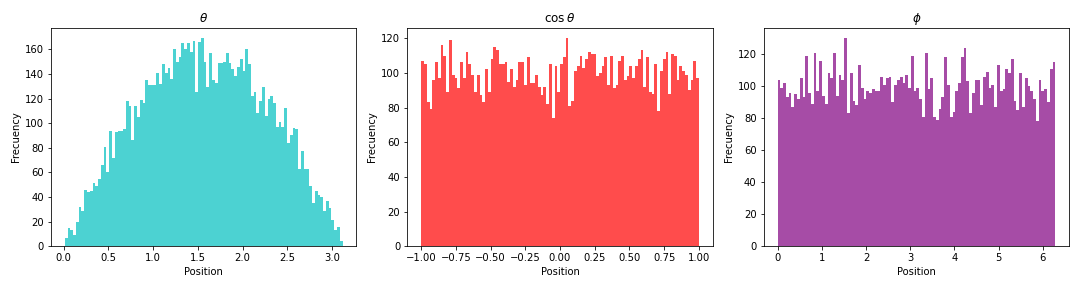

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))

axs[0].hist(sphere[0], bins=100, color='c', alpha=0.7)
axs[0].set_title(r'$\theta$')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Frecuency')

axs[1].hist(sphere[2], bins=100, color='r', alpha=0.7)
axs[1].set_title(r'$\cos{\theta}$')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Frecuency')

axs[2].hist(sphere[1], bins=100, color='purple', alpha=0.7)
axs[2].set_title(r'$\phi$')
axs[2].set_xlabel('Position')
axs[2].set_ylabel('Frecuency')

plt.tight_layout()

plt.show()

To observe how the uniform random sampling behaves in spherical coordinates, we plotted the histograms in the $\theta$, $\cos \theta$ and $\phi$ coordinates. 

The coordinate $\theta$ has an inhomogeneous distribution of points, while $\cos \theta$ has an uniform one. These plots support the idea that a uniform random distribution of points over the total area of a sphere, shows an higher count of points near the equator due to the  non-linear changes of the surface element with $\theta$ , but instead with $\cos \theta$. 